In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from sympy import Symbol
import random as rd
plt=reload(plt)

## Исходная функция

In [27]:
def fn(x):
    return x**2 + np.sin(x)

In [28]:
a = int(input('Введите левую границу a: '))
b = int(input('Введите правую границу b: '))

fun_vals = []
eps = 10
x, y = [], []
interval = np.linspace(a, b, 5)

# Генерируем приближенные значения функции в абсциссах
for i in interval:
    fun_vals.append(fn(i) + ((-1)**(rd.randint(-1, 1)))*2*np.cos(i))
    x.append(i)
    
x = np.array(x, float)    
y = np.array(fun_vals, float)

# print('Множество абсцисс: ', x)
# print('Множество ординат: ', y)

n = int(input('Введите Степень многочлена для МНК n (она должна быть меньше числа точек из входных данных!): '))

Введите левую границу a: -5
Введите правую границу b: 5
Введите Степень многочлена для МНК n (она должна быть меньше числа точек из входных данных!): 3


## Нормальные уравнения

Для построения многочлена МНК степени $n$ (то есть $a_0 + a_1x + \dots + a_n x^n$) рассмотрим
![image](12.jpeg)
Из матана известно, что необходимым условием минимума $g(a_0,\dots,a_n)$ является условие

![image](13.jpeg)

Собираем коэффициенты при $a_i$ и переписываем систему в матричном виде

![image](10.jpeg)
которую можно снова переписать:

## $$E^T E a = E^T f$$
![image](11.jpeg)

Важно: если хотя бы $n+1$ точки из $x_1,\dots,x_m$ различны  $\Rightarrow rang\;E = n+1 \Rightarrow$ у системы $\exists !$ решение $\Rightarrow \exists !$ точка минимума у $g(a_0,\dots,a_n) \Rightarrow$ у МНК $\exists !$ решение

matrixA:
 [[   1.      -5.      25.    -125.   ]
 [   1.      -2.5      6.25   -15.625]
 [   1.       0.       0.       0.   ]
 [   1.       2.5      6.25    15.625]
 [   1.       5.      25.     125.   ]]
matrixB:
 [[26.52624865]
 [ 7.25381509]
 [-2.        ]
 [ 8.45075938]
 [23.47375135]]
coeff:
 [[ 0.12728267]
 [ 0.42093505]
 [ 1.00909058]
 [-0.02904739]]

Коэффициенты многочлена:
0.1272826727500833
0.420935053228078
1.0090905775749972
-0.02904739129383985

Стандартное отклонение:  2.966353962380936

Коэффициент корреляции:  0.992265466465911


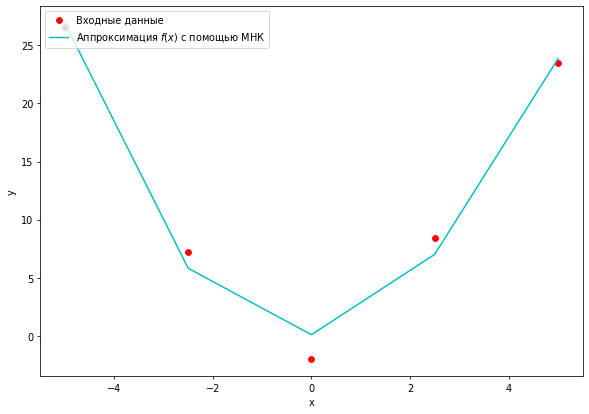

In [29]:
# рассматриваем многочлен: y = c0 + c1(x) + c2(x**2) +...+ cn(x**n)

pts = len(x) # число точек во входных данных
polyval = [] # здесь будем хранить poly fit values

if n+1 > pts:
    print('Внимание: Степень многочлена должга быть меньше числа точек из входных данных')
    print('Проверьте правильность введенных данных')
    sys.exit()

# Реализация МНК
else:
    # создаем матрицу А, матрицу Вандермонда E в обозначениях выше
    matrixA = np.zeros((pts, n + 1)) 
    # создаем матрицу В, f в обозначениях выше
    matrixB = np.zeros((pts, 1))

    # loop to populate arrays
    for i in range(pts):
        matrixB[i][0] = y[i]
        for j in range(n + 1):
            matrixA[i][j] = (x[i])**j

    print('matrixA:\n',matrixA)
    print('matrixB:\n',matrixB)
    
    # Нормальные уравнения (A^T) A x = (A^T) b
    At = np.transpose(matrixA) 
    AtA = np.dot(At, matrixA) 
    AtB = np.dot(At, matrixB) 
    coeff = np.linalg.solve(AtA, AtB) 
    print('coeff:\n',coeff)

    for i in range(pts):
        yval = 0
        for j in range(n + 1):
            yval = yval + coeff[j, 0]*(x[i])**j 
        polyval.append(yval)

    def approximation(arg):
        arg = Symbol('x')
        function = 0
        for i in range(pts):
            function += polyval[i] * arg**i
        return function
    
    # Стандартное отклонение
    error = y - polyval
    sumval = np.sum(error**2)
    stddev = (sumval/(pts - (n + 1)))**0.5

    # Коэффициенты корреляции
    ymean = np.sum(y)/pts
    sumfit = np.sum((y - ymean)**2)
    rvalue = ((sumfit - sumval)/sumfit)**0.5

    # Визуализация
    plt.figure(figsize=(10, 7), dpi=70)
    plt.plot(x, y, 'ro', label='Входные данные')
    plt.plot(x, polyval, 'c-', label='Аппроксимация $f(x)$ с помощью МНК')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc=2)

    
    print('\nКоэффициенты многочлена:')
    for i in coeff.flatten():
        print(i)
    print('\nСтандартное отклонение: ', stddev)
    print('\nКоэффициент корреляции: ', rvalue)